## 100 pandas puzzles
Inspired by 100 Numpy exerises, here are 100* short puzzles for testing your knowledge of pandas' power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects.

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation is very extensive. In particular, some good places get a broader overview of pandas are...

10 minutes to pandas
pandas basics
tutorials
cookbook and idioms


Enjoy the puzzles!

* the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.

## Importing pandas
# Getting started and checking your pandas setup
Difficulty: easy

In [2]:
# 1. Import pandas under the alias pd.

import pandas as pd

In [4]:
# 2. Print the version of pandas that has been imported.

print(pd.__version__);

2.2.2


In [6]:
# 3. Print out all the version information of the libraries that are required by the pandas library.

print(pd.show_versions());


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.12.3.final.0
python-bits           : 64
OS                    : Darwin
OS-release            : 21.6.0
Version               : Darwin Kernel Version 21.6.0: Sun Dec 17 22:55:27 PST 2023; root:xnu-8020.240.18.706.2~1/RELEASE_X86_64
machine               : x86_64
processor             : i386
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : None.UTF-8

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2024.1
dateutil              : 2.9.0.post0
setuptools            : 70.1.0
pip                   : 24.0
Cython                : None
pytest                : None
hypothesis            : None
sphinx                : None
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : None
html5lib              : None
pymysq

# DataFrame basics
## A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames
Difficulty: easy

Note: remember to import numpy using:

In [7]:
import numpy as np;

# 4. Create a DataFrame df from this dictionary data which has the index labels.

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels);
print(df);

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


In [10]:
# 5. Display a summary of the basic information about this DataFrame and its data (hint: there is a single method that can be called on the DataFrame).
print(df.info())
print(df.describe());

            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000


In [19]:
# 6. Return the first 3 rows of the DataFrame df.
print(df.iloc[:3]);
print(df.head(3));

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


In [21]:
# 7. Select just the 'animal' and 'age' columns from the DataFrame df.

df[['animal', 'age']];
print(df.loc[:, ['animal', 'age']]);

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


In [27]:
# 8. Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].
print(df.loc[df.index[[3,4,8]], ['animal', 'age']]);

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


In [31]:
# 9. Select only the rows where the number of visits is greater than 3.
print(df['visits'] > 3);

a    False
b     True
c    False
d     True
e    False
f     True
g    False
h    False
i    False
j    False
Name: visits, dtype: bool


In [35]:
# 10. Select the rows where the age is missing, i.e. it is NaN.

print(df[df['age'].isnull()]);

  animal  age  visits priority
d    dog  NaN       3      yes
h    cat  NaN       1      yes


In [38]:
# 11. Select the rows where the animal is a cat and the age is less than 3.
print(df[(df['animal'] == 'cat') & (df['age'] < 3)]);

  animal  age  visits priority
a    cat  2.5       1      yes
f    cat  2.0       3       no


In [40]:
# 12. Select the rows the age is between 2 and 4 (inclusive).

print(df[df['age'].between(2,4)]);

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
f    cat  2.0       3       no
j    dog  3.0       1       no


In [43]:
# 13. Change the age in row 'f' to 1.5
data = df.loc['f', 'age'] = 1.5;
print(data);

1.5


In [45]:
# 14. Calculate the sum of all visits in df (i.e. find the total number of visits).

sum_visits = df['visits'].sum();
print(sum_visits); 

19


In [46]:
# 15. Calculate the mean age for each different animal in df

mean_age = df['age'].mean();
print(mean_age);

3.375


In [50]:
# 16. Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original DataFrame.

df.loc['k'] = [10, 'Error', 'yes', 2];
print(df);

df = df.drop('k');
print(df);


  animal    age visits priority
a    cat    2.5      1      yes
b    cat    3.0      3      yes
c  snake    0.5      2       no
d    dog    NaN      3      yes
e    dog    5.0      2       no
f    cat    1.5      3       no
g  snake    4.5      1       no
h    cat    NaN      1      yes
i    dog    7.0      2       no
j    dog    3.0      1       no
k     10  Error    yes        2
  animal  age visits priority
a    cat  2.5      1      yes
b    cat  3.0      3      yes
c  snake  0.5      2       no
d    dog  NaN      3      yes
e    dog  5.0      2       no
f    cat  1.5      3       no
g  snake  4.5      1       no
h    cat  NaN      1      yes
i    dog  7.0      2       no
j    dog  3.0      1       no


In [54]:
# 17. Count the number of each type of animal in df.

count_animal = df['animal'].value_counts();
print(count_animal);

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64


In [58]:
# 18. Sort df first by the values in the 'age' in decending order, then by the value in the 'visits' column in ascending order (so row i should be first, and row d should be last).

df.sort_values(by=['age', 'visits'], ascending=[False, True]);



In [68]:
# 19. The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False.

df['priority'] = df['priority'].map({'yes': True, 'no': False});

  animal  age visits priority
a    cat  2.5      1      NaN
b    cat  3.0      3      NaN
c  snake  0.5      2      NaN
d    dog  NaN      3      NaN
e    dog  5.0      2      NaN
f    cat  1.5      3      NaN
g  snake  4.5      1      NaN
h    cat  NaN      1      NaN
i    dog  7.0      2      NaN
j    dog  3.0      1      NaN


In [72]:
# 20. In the 'animal' column, change the 'snake' entries to 'python'.

df['animal'] = df['animal'].replace('snake', 'python');
print(df);

   animal  age visits priority
a     cat  2.5      1      NaN
b     cat  3.0      3      NaN
c  python  0.5      2      NaN
d     dog  NaN      3      NaN
e     dog  5.0      2      NaN
f     cat  1.5      3      NaN
g  python  4.5      1      NaN
h     cat  NaN      1      NaN
i     dog  7.0      2      NaN
j     dog  3.0      1      NaN


In [73]:
# 21. For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

data = df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean');
print(data);

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN


# DataFrames: beyond the basics
## Slightly trickier: you may need to combine two or more methods to get the right answer
Difficulty: medium

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

In [84]:
df = pd.DataFrame({'A':[1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]});
# print(df);

# Remove duplicate value
# --- One Way -----
# duplicated_value = df.drop_duplicates();
# print(duplicated_value);

# ----- Second Way -----
print(df.drop_duplicates(subset='A'));

   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


In [87]:
# 23. Given a DataFrame of numeric values, say

df = pd.DataFrame(np.random.random(size=(5, 3)));
print(df.sub(df.mean(axis=1), axis=0));

          0         1         2
0  0.278446 -0.059389 -0.219057
1 -0.071270  0.026399  0.044871
2 -0.224862 -0.112759  0.337621
3  0.293830  0.004315 -0.298145
4  0.020624  0.237363 -0.257987


In [90]:
# 24. Suppose you have DataFrame with 10 columns of real numbers, for example:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
# Which column of numbers has the smallest sum? Return that column's label.
print(df.min().idxmin());

a


In [94]:
# 25. How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

# --- First Way -----
len(df) - df.duplicated(keep=False).sum();

# --- Second Way ------
print(len(df.drop_duplicates(keep=False).sum()));

3


In [102]:
# 26. In the cell below, you have a DataFrame df that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

# For each row of the DataFrame, find the column which contains the third NaN value.

# You should return a Series of column labels: e, c, d, h, d

nan = np.nan;

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list("abcdefghij");

find_thired_nan_value = (df.isnull().cummax(axis=1) == 3).idxmax(axis=1);
print(find_thired_nan_value);


0    a
1    a
2    a
3    a
4    a
dtype: object


In [115]:
# 27. A DataFrame has a column of groups 'grps' and and column of integer values 'vals':

df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

print(df.groupby('grps')['vals'].apply(lambda x : x.nlargest(3).sum()));

grps
a    409
b    156
c    345
Name: vals, dtype: int64


In [120]:
# 28. The DataFrame df constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive).

# For each group of 10 consecutive integers in 'A' (i.e. (0, 10], (10, 20], ...), calculate the sum of the corresponding values in column 'B'.

df = pd.DataFrame(np.random.RandomState(8765).randint(1,101, size=(100,2)), columns=["A", "B"]);

data = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum();
print(data);

A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int64


/var/folders/z8/ps6_dsc14cq7459p6g6zdqmh0000gn/T/ipykernel_3815/2440039880.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum();


# DataFrames: harder problems
## These might require a bit of thinking outside the box...
...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit for loops).

Difficulty: hard

In [125]:
# 29. Consider a DataFrame df where there is an integer column 'X':

df = pd.DataFrame({'X' : [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]});

# ----- First Way ------
is_zero = np.r_[-1, (df == 0).values.nonzero()[0]];
index = np.arange(len(df));
y = df['X'] != 0;
df['Y'] = index - is_zero[np.searchsorted(is_zero - 1, index) - 1];
print(df);

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


In [135]:
# 30. Consider the DataFrame constructed below which contains rows and columns of numerical data.

# Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:

# [(5, 7), (6, 4), (2, 5)]

df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))

data = df.unstack().sort_values()[-3:].index.to_list();
print(data);


[(5, 7), (6, 4), (2, 5)]


In [141]:
# 31. You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

# Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})

group_means = df.groupby('grps')['vals'].mean();
df['patched_values'] = np.where(df['vals'] < 0, df['grps'].map(group_means), df['vals']);

print(df);

    vals grps  patched_values
0    -12    A       -0.333333
1     -7    B        6.333333
2    -14    A       -0.333333
3      4    A        4.000000
4     -7    A       -0.333333
5     28    B       28.000000
6     -2    A       -0.333333
7     -1    A       -0.333333
8      8    A        8.000000
9     -2    B        6.333333
10    28    A       28.000000
11    12    A       12.000000
12    16    A       16.000000
13   -24    A       -0.333333
14   -12    A       -0.333333


In [151]:
# 32. Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

# E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})

g1 = df.groupby(['group'])['value'];
g2 = df.fillna(0).groupby(['group'])['value'];

res = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count();

print(res);


group    
a      0     1.000000
       1     1.500000
       4     1.666667
       8     3.666667
       10    4.500000
b      2     3.000000
       3     3.000000
       5     3.000000
       6     3.000000
       7     2.000000
       9     2.000000
       11    4.000000
Name: value, dtype: float64


# Series and DatetimeIndex
## Exercises for creating and manipulating Series with datetime data
Difficulty: easy/medium

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.

In [169]:
# 33. Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series s.

date_time = pd.date_range(start="2024-01-01", end="2024-12-31", freq='B');
result_of_date_time = pd.Series(np.random.randint(len(date_time)), index=date_time);

result_of_date_time


2024-01-01    9
2024-01-02    9
2024-01-03    9
2024-01-04    9
2024-01-05    9
             ..
2024-12-25    9
2024-12-26    9
2024-12-27    9
2024-12-30    9
2024-12-31    9
Freq: B, Length: 262, dtype: int64

In [170]:
# 34. Find the sum of the values in s for every Wednesday.

every_wednesday_sum = result_of_date_time[result_of_date_time.index.weekday == 2].sum();
every_wednesday_sum


468

In [172]:
# 35. For each calendar month in s, find the mean of values.

data = result_of_date_time.resample("M").mean();

data

/var/folders/z8/ps6_dsc14cq7459p6g6zdqmh0000gn/T/ipykernel_3815/2509854829.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = result_of_date_time.resample("M").mean();


2024-01-31    9.0
2024-02-29    9.0
2024-03-31    9.0
2024-04-30    9.0
2024-05-31    9.0
2024-06-30    9.0
2024-07-31    9.0
2024-08-31    9.0
2024-09-30    9.0
2024-10-31    9.0
2024-11-30    9.0
2024-12-31    9.0
Freq: ME, dtype: float64

In [173]:
# 36. For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

data = result_of_date_time.groupby(pd.Grouper(freq="4M")).idxmax();
data

/var/folders/z8/ps6_dsc14cq7459p6g6zdqmh0000gn/T/ipykernel_3815/3968709635.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = result_of_date_time.groupby(pd.Grouper(freq="4M")).idxmax();


2024-01-31   2024-01-01
2024-05-31   2024-02-01
2024-09-30   2024-06-03
2025-01-31   2024-10-01
Freq: 4ME, dtype: datetime64[ns]

In [174]:
# 37. Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

data = pd.date_range('2024-01-01', '2025-12-31', freq="WOM-3THU");
data

DatetimeIndex(['2024-01-18', '2024-02-15', '2024-03-21', '2024-04-18',
               '2024-05-16', '2024-06-20', '2024-07-18', '2024-08-15',
               '2024-09-19', '2024-10-17', '2024-11-21', '2024-12-19',
               '2025-01-16', '2025-02-20', '2025-03-20', '2025-04-17',
               '2025-05-15', '2025-06-19', '2025-07-17', '2025-08-21',
               '2025-09-18', '2025-10-16', '2025-11-20', '2025-12-18'],
              dtype='datetime64[ns]', freq='WOM-3THU')

# Cleaning Data
## Making a DataFrame easier to work with
Difficulty: easy/medium

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

In [175]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [179]:
# 38. Some values in the the FlightNumber column are missing (they are NaN). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify df to fill in these missing numbers and make the column an integer column (instead of a float column).

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int);
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [182]:
# 39. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

temp = df.From_To.str.split("_", expand=True);
temp.columns = ["From", "To"];
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [184]:
# 40. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

temp["From"] = temp['From'].str.capitalize();
temp['To'] = temp['To'].str.capitalize();
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [194]:
# <!-- 41. Delete the From_To column from df and attach the temporary DataFrame 'temp' from the previous questions. -->

df["From"] = temp["From"];
df["To"] = temp["To"];
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [198]:
# 42. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

df["Airline"] = df["Airline"].str.extract('([a-zA-Z\s]+)', expand=False).str.strip();
df

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/z8/ps6_dsc14cq7459p6g6zdqmh0000gn/T/ipykernel_3815/2300241866.py:3: SyntaxWarning: invalid escape sequence '\s'
  df["Airline"] = df["Airline"].str.extract('([a-zA-Z\s]+)', expand=False).str.strip();


,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",K,London,Paris
1,10055,[],A,Madrid,Milan
2,10065,"[24, 43, 87]",B,London,Stockholm
3,10075,[13],NaN,Budapest,Paris
4,10085,"[67, 32]",S,Brussels,London


In [199]:
# 43. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

# Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

delays = df['RecentDelays'].apply(pd.Series);
delays.columns = ['delays_{}'.format(n) for n in range(1, len(delays.columns) + 1)];
df = df.drop("RecentDelays", axis=1).join(delays);
df

,FlightNumber,Airline,From,To,delays_1,delays_2,delays_3
0,10045,K,London,Paris,23.0,47.0,NaN
1,10055,A,Madrid,Milan,NaN,NaN,NaN
2,10065,B,London,Stockholm,24.0,43.0,87.0
3,10075,NaN,Budapest,Paris,13.0,NaN,NaN
4,10085,S,Brussels,London,67.0,32.0,NaN


# Using MultiIndexes
## Go beyond flat DataFrames with additional index levels
Difficulty: medium

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using multiple levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

In [212]:
# 44. Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.

letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index=mi)
s

A  0    0.486841
   1    0.919197
   2    0.102391
   3    0.153572
   4    0.734529
   5    0.337741
   6    0.645951
   7    0.862844
   8    0.701595
   9    0.027175
B  0    0.539492
   1    0.114945
   2    0.161464
   3    0.763500
   4    0.247530
   5    0.806889
   6    0.487343
   7    0.467841
   8    0.383953
   9    0.859221
C  0    0.665111
   1    0.916808
   2    0.429476
   3    0.167964
   4    0.619973
   5    0.451018
   6    0.587708
   7    0.195650
   8    0.973682
   9    0.475253
dtype: float64

In [214]:
# 45. Check the index of s is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

print(s.index.is_lexsorted());


AttributeError: 'MultiIndex' object has no attribute 'is_lexsorted'

In [216]:
# 46. Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.
print(s.loc[:, [1,3,6]]);

A  1    0.919197
   3    0.153572
   6    0.645951
B  1    0.114945
   3    0.763500
   6    0.487343
C  1    0.916808
   3    0.167964
   6    0.587708
dtype: float64


In [219]:
# 47. Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level.

# --- First Way ------
print(s.loc[:'B', 5:]);

# --- Second Way ------
slice = s.loc[pd.IndexSlice[:'B', 5:]];
print(slice);

A  5    0.337741
   6    0.645951
   7    0.862844
   8    0.701595
   9    0.027175
B  5    0.806889
   6    0.487343
   7    0.467841
   8    0.383953
   9    0.859221
dtype: float64
A  5    0.337741
   6    0.645951
   7    0.862844
   8    0.701595
   9    0.027175
B  5    0.806889
   6    0.487343
   7    0.467841
   8    0.383953
   9    0.859221
dtype: float64


In [221]:
#  48. Sum the values in s for each label in the first level (you should have Series giving you a total for labels A, B and C).

print(f"Sum of first level:- {s.sum(level=0)}");

TypeError: sum() got an unexpected keyword argument 'level'

In [222]:
s.unstack().sum(axis=0);
s

A  0    0.486841
   1    0.919197
   2    0.102391
   3    0.153572
   4    0.734529
   5    0.337741
   6    0.645951
   7    0.862844
   8    0.701595
   9    0.027175
B  0    0.539492
   1    0.114945
   2    0.161464
   3    0.763500
   4    0.247530
   5    0.806889
   6    0.487343
   7    0.467841
   8    0.383953
   9    0.859221
C  0    0.665111
   1    0.916808
   2    0.429476
   3    0.167964
   4    0.619973
   5    0.451018
   6    0.587708
   7    0.195650
   8    0.973682
   9    0.475253
dtype: float64

# Minesweeper
## Generate the numbers for safe squares in a Minesweeper grid
Difficulty: medium to hard

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:

If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

In [224]:
# 51. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.

# X = 5
# Y = 4
# To begin, generate a DataFrame df with two columns, 'x' and 'y' containing every coordinate for this grid. That is, the DataFrame should start:

#    x  y
# 0  0  0
# 1  0  1
# 2  0  2
# ...

X = 5
Y = 4

p = pd.core.reshape.util.cartesian_product([np.arange(X), np.arange(Y)]);
df = pd.DataFrame(np.asarray(p).T, columns=['X', 'Y']);
df

,X,Y
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


In [225]:
# 52 For this DataFrame df, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

df['mine'] = np.random.binomial(1, 0.4, X*Y);
df

,X,Y,mine
0,0,0,0
1,0,1,0
2,0,2,1
3,0,3,0
4,1,0,0
5,1,1,1
6,1,2,1
7,1,3,0
8,2,0,1
9,2,1,1


In [230]:
# 53. Now create a new column for this DataFrame called 'adjacent'. This column should contain the number of mines found on adjacent squares in the grid.

# (E.g. for the first row, which is the entry for the coordinate (0, 0), count how many mines are found on the coordinates (0, 1), (1, 0) and (1, 1).)

df['adjacent'] = \
    df.merge(df + [ 1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1, -1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [-1,  0, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0,  1, 0], on=['x', 'y'], how='left')\
      .merge(df + [ 0, -1, 0], on=['x', 'y'], how='left')\
       .iloc[:, 3:]\
        .sum(axis=1)
        

df

KeyError: 'x'

In [232]:
# 54. For rows of the DataFrame that contain a mine, set the value in the 'adjacent' column to NaN.

set_nan = df.loc[df['mine'] == 1, 'adjacent'] = np.nan
print(set_nan);

nan


In [235]:
# 55. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the x coordinate, rows are the y coordinate.

df.drop("mine", axis=1).set_index(['Y', 'X']).unstack();
df

,X,Y,mine,adjacent
0,0,0,0,NaN
1,0,1,0,NaN
2,0,2,1,NaN
3,0,3,0,NaN
4,1,0,0,NaN
5,1,1,1,NaN
6,1,2,1,NaN
7,1,3,0,NaN
8,2,0,1,NaN
9,2,1,1,NaN


# Plotting
## Visualize trends and patterns in data
Difficulty: medium

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

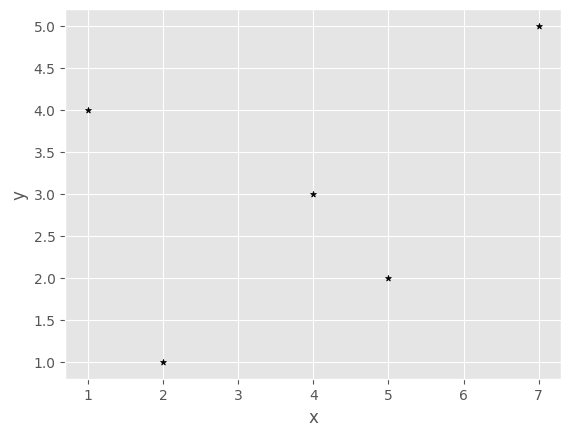

In [241]:
import matplotlib.pyplot as plt;

plt.style.use("ggplot");

df = pd.DataFrame({'x': [1,5,4,2,7], 'y': [4,2,3,1,5]});

df.plot.scatter('x', 'y', color="black", marker = "*");

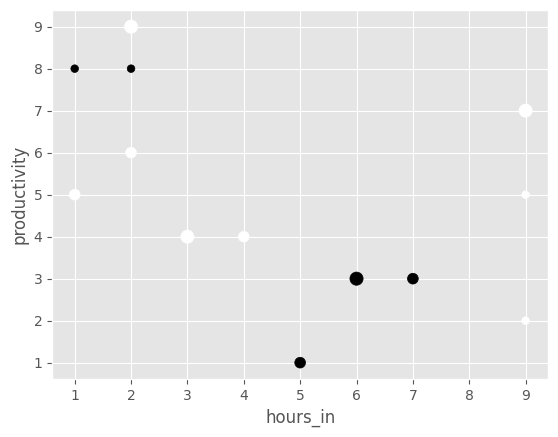

In [244]:
# 57. Columns in your DataFrame can also be used to modify colors and sizes. Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning. Make a plot which incorporates all four features of this DataFrame.

# (Hint: If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

# The chart doesn't have to be pretty: this isn't a course in data viz!

df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})


df.plot.scatter("hours_in", "productivity", s = df["happiness"] * 30, c=df["caffienated"]);

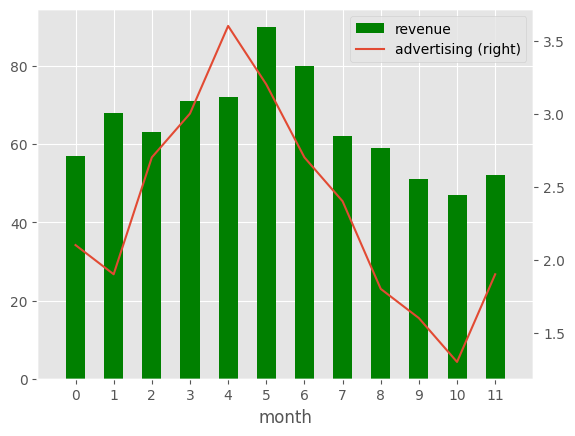

In [248]:
# 58. What if we want to plot multiple things? Pandas allows you to pass in a matplotlib Axis object for plots, and plots will also return an Axis object.

# Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color="green");
df.plot.line("month", "advertising", secondary_y=True, ax=ax);
ax.set_xlim((-1, 12));

In [ ]:
# Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data. A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window. The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

# This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods. If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

# Your first step should be to get the data in the correct format using pandas' time-series grouping function. We would like each candle to represent an hour's worth of data. You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

# The below cell contains helper functions. Call 'day_stock_data()' to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred. Call 'plot_candlestick(df)' on your properly aggregated and formatted stock data to print the candlestick chart.

import numpy as np;
def float_to_time(x):
    return str(int(x)) + ":" + str